<a href="https://colab.research.google.com/github/isurushanaka/AII_WorkShop/blob/main/Project4%20-%20Image%20Classification/image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fashion MNIST dataset

![convert notebook to web app](https://www.tensorflow.org/images/fashion-mnist-sprite.png)

The Fashion MNIST dataset is a dataset comprised of 60,000 small square 28×28 pixel grayscale images of items of 10 types of clothing. Additionallly, a test set of 10,000 images also given.

| Label | Description|
| --- | --- |
|0 | T-shirt/top|
|1	|Trouser|
|2	|Pullover|
|3	|Dress|
|4|	Coat|
|5	|Sandal|
|6	|Shirt|
|7	|Sneaker|
|8	|Bag|
|9	|Ankle boot|

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

Load the dataset

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()


4422102/4422102 [==============================] - 0s 0us/step


Show some examples

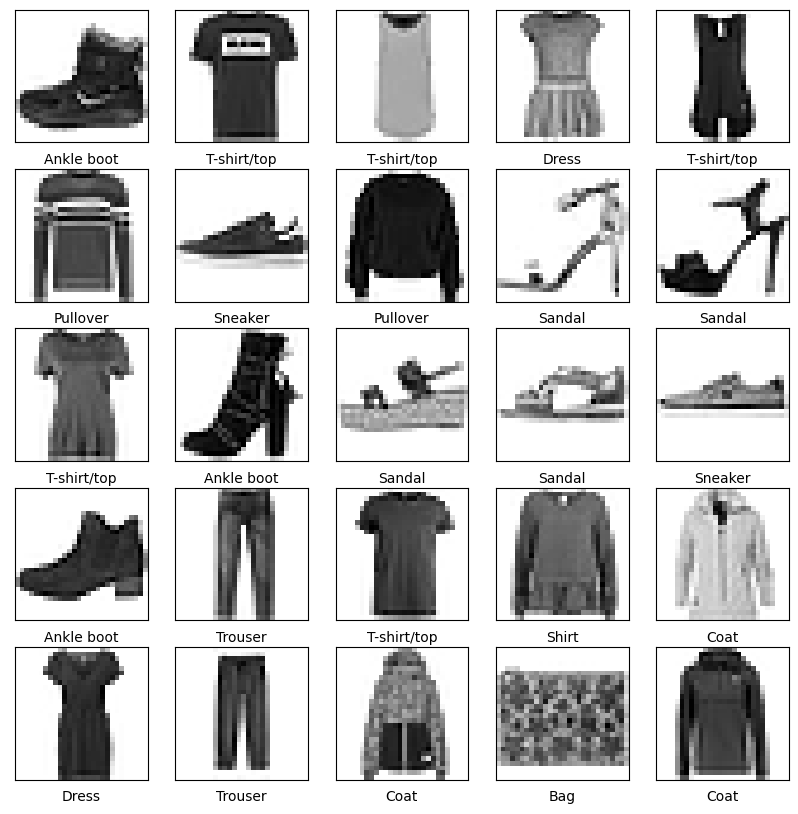

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

# Build a FFNN model

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

Compile the model

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Train the model

In [ ]:
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 14s 5ms/step - loss: 3.0710 - accuracy: 0.6992
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.6485 - accuracy: 0.7650
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5665 - accuracy: 0.8026
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5383 - accuracy: 0.8154
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5183 - accuracy: 0.8222
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5091 - accuracy: 0.8260
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4929 - accuracy: 0.8319
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4844 - accuracy: 0.8339
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4835 - accuracy: 0.8339
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.47

Evaluate the model

In [ ]:
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.5003 - accuracy: 0.8364 - 1s/epoch - 3ms/step

Test accuracy: 0.8363999724388123


Make predictions

With the model trained, you can use it to make predictions about some images. Attach a softmax layer to convert the model's linear outputs—logits—to probabilities, which should be easier to interpret.

In [ ]:
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [ ]:
predictions[0]

array([7.3971021e-29, 4.2933853e-19, 0.0000000e+00, 8.3192472e-17,
       0.0000000e+00, 2.0497849e-02, 0.0000000e+00, 2.0697424e-02,
       2.1775432e-18, 9.5880467e-01], dtype=float32)

In [ ]:
np.argmax(predictions[0])

9

In [ ]:
y_test[0]

9

Two helper class to plot some results

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

plot some results

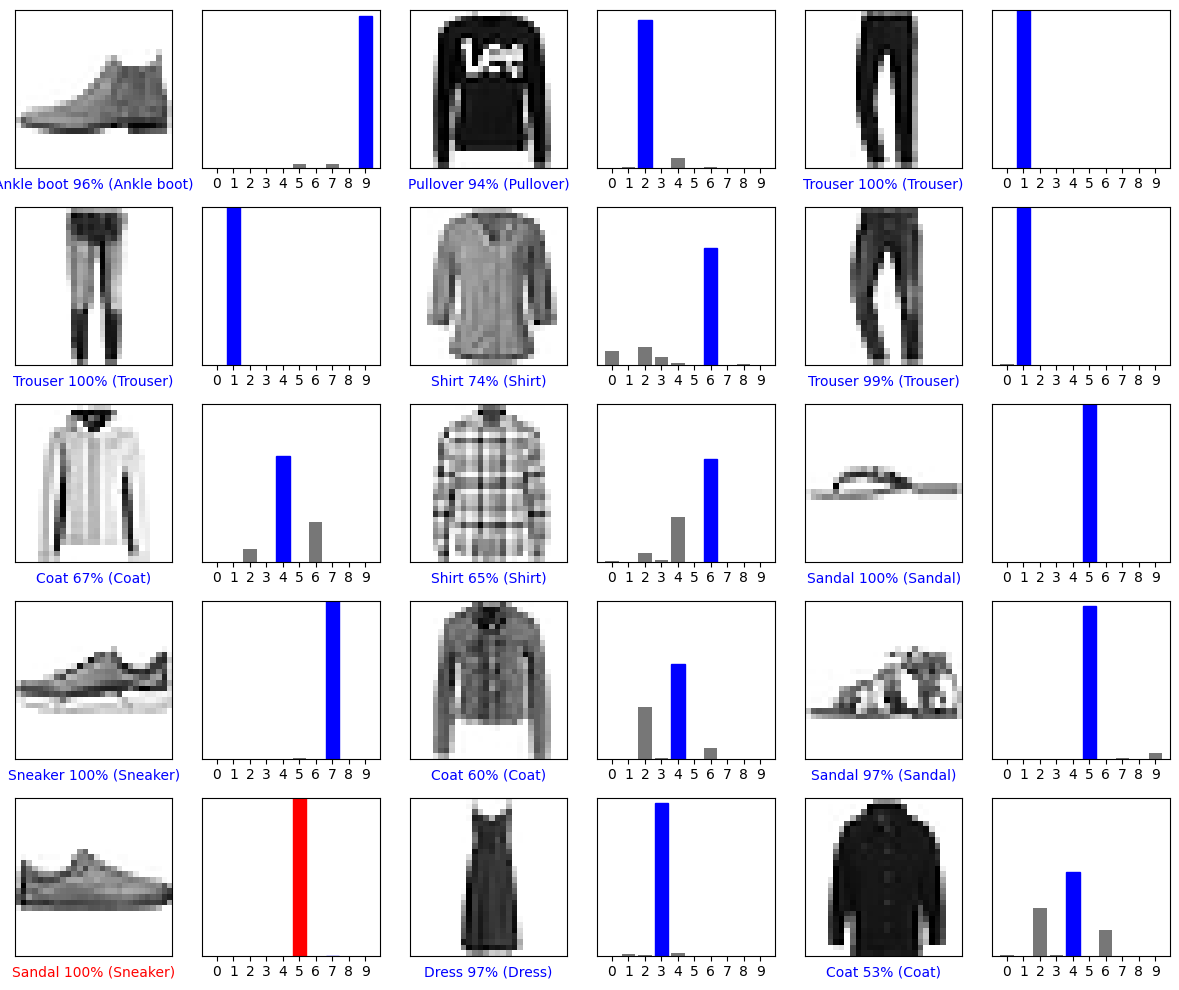

In [ ]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], y_test, x_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], y_test)
plt.tight_layout()
plt.show()

This code is an extraction of [Keras Basic classification: Classify images of clothing](https://www.tensorflow.org/tutorials/keras/classification)

# Build a CNN model

Reshape dataset to have a single channel

In [ ]:
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))

One hot encode target values

In [ ]:
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

Nomalizing input pixel values

In [ ]:
# convert from integers to floats
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# normalize to range 0-1
x_train = x_train / 255.0
x_test = x_test / 255.0

Build and compile the CNN model

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD

def define_model():
 model = Sequential()
 model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
 model.add(MaxPooling2D((2, 2)))
 model.add(Flatten())
 model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
 model.add(Dense(10, activation='softmax'))
 # compile model
 opt = SGD(learning_rate=0.01, momentum=0.9)
 model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
 return model

Train the model

In [ ]:
model = define_model()
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test), verbose=1)

Epoch 1/10
1875/1875 [==============================] - 46s 24ms/step - loss: 0.4405 - accuracy: 0.8420 - val_loss: 0.3460 - val_accuracy: 0.8758
Epoch 2/10
1875/1875 [==============================] - 44s 24ms/step - loss: 0.2871 - accuracy: 0.8954 - val_loss: 0.2997 - val_accuracy: 0.8891
Epoch 3/10
1875/1875 [==============================] - 42s 23ms/step - loss: 0.2445 - accuracy: 0.9110 - val_loss: 0.2803 - val_accuracy: 0.8982
Epoch 4/10
1875/1875 [==============================] - 42s 23ms/step - loss: 0.2160 - accuracy: 0.9213 - val_loss: 0.2755 - val_accuracy: 0.8995
Epoch 5/10
1875/1875 [==============================] - 49s 26ms/step - loss: 0.1950 - accuracy: 0.9289 - val_loss: 0.2733 - val_accuracy: 0.9025
Epoch 6/10
1875/1875 [==============================] - 43s 23ms/step - loss: 0.1749 - accuracy: 0.9357 - val_loss: 0.2748 - val_accuracy: 0.9077
Epoch 7/10
1875/1875 [==============================] - 43s 23ms/step - loss: 0.1582 - accuracy: 0.9421 - val_loss: 0.2610 -

Evaluate the model

In [ ]:
_, acc = model.evaluate(x_test, y_test, verbose=1)
print('> %.3f' % (acc * 100.0))

313/313 [==============================] - 3s 11ms/step - loss: 0.3229 - accuracy: 0.9041
> 90.410


In [ ]:
predictions = model.predict(x_test)

313/313 [==============================] - 2s 7ms/step


In [ ]:
predictions[0]

array([2.8647746e-06, 8.9919722e-10, 1.5527946e-06, 3.0230733e-08,
       4.6265217e-08, 3.9886780e-07, 1.6833174e-10, 2.9184844e-04,
       2.2260717e-07, 9.9970305e-01], dtype=float32)

In [ ]:
np.argmax(predictions[0])

9

In [ ]:
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [ ]:
np.argmax(y_test[0])

9

Two helper class to plot some results

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = np.argmax(true_label[i]), img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = np.argmax(true_label[i])
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

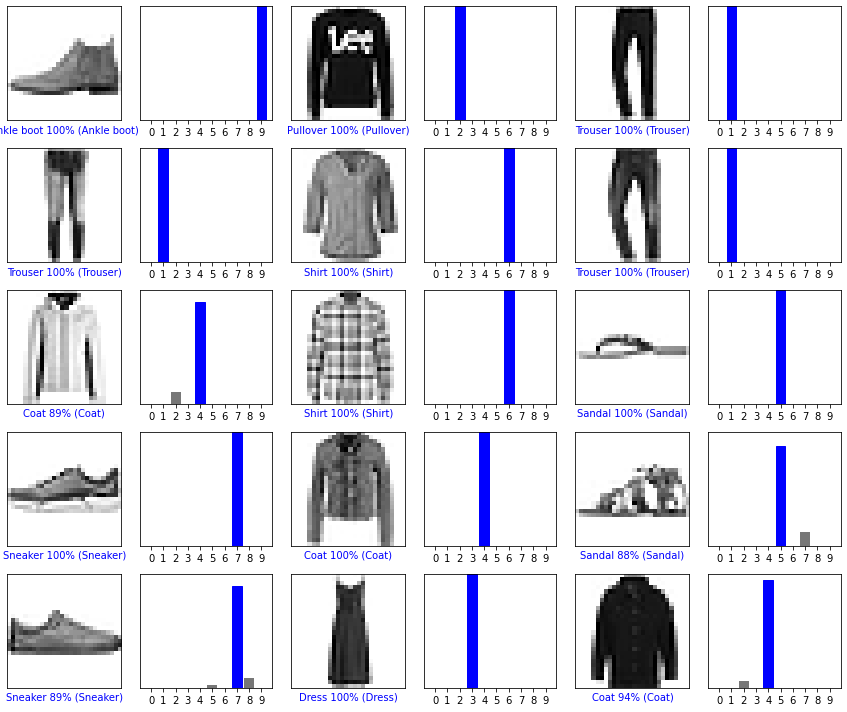

In [ ]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], y_test, x_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], y_test)
plt.tight_layout()
plt.show()